# Introduction to Matplotlib
Matplotlib is a data visualization library in Python

In [2]:
# import
import matplotlib.pyplot as plt # convention
import numpy as np
import pandas as pd

## Basic example: Plotting a sine curve

In [3]:
# Set up some data
x = np.linspace(0,10,100) # creates 100 equally spaced points between 0 and 10
y = np.sin(x)

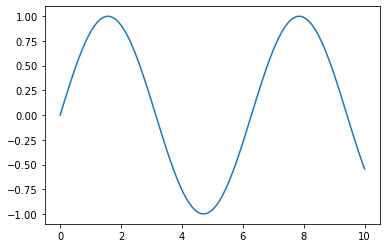

In [4]:
# Passing in these two objects into the plot function will plot a line through the (x,y) pairs
plt.plot(x,y)

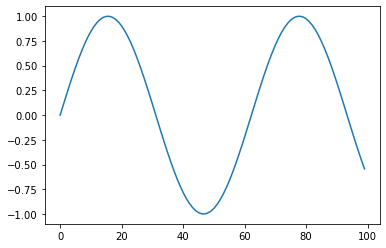

In [5]:
# Passing in just the y-values plots y against an implicit index
plt.plot(y)

### Matplotlib Interfaces
Matplotlib offers two interfaces:
- MATLAB style interface: 'Stateful' interface where we need to keep track of the current figure and axis
- Object Oriented interface: Non-stateful interface

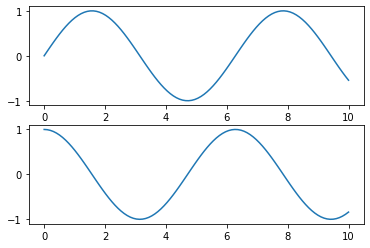

In [6]:
# Example: MATLAB interface:

plt.figure()

# Set context
plt.subplot(2,1,1) # row, column, subplot_number
plt.plot(x, np.sin(x))

# Set context
plt.subplot(2,1,2)
plt.plot(x, np.cos(x))

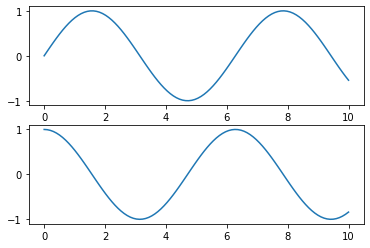

In [7]:
# Example: OO Interface
fig, axarr = plt.subplots(2,1) # 2 rows, 1 column
axarr[0].plot(x, np.sin(x))
axarr[1].plot(x, np.cos(x))

### Line Plots

Plots a line through all the x and y values in order

- `color`
- `alpha`
- `linestyle`
- `marker`
- `linewidth`
- `label`

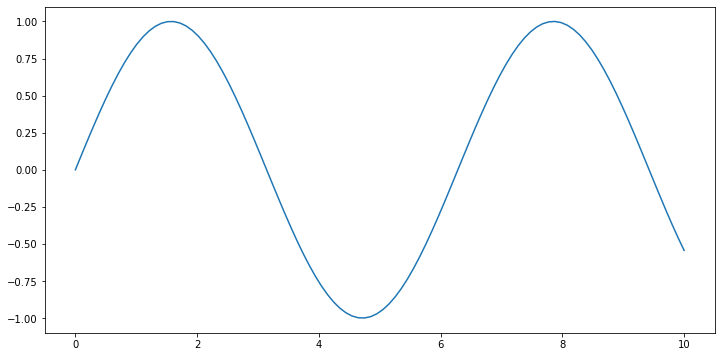

In [8]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, np.sin(x))

# TODO: Uncomment each section to see the effect

# # alpha: Controls the transparency - number between 0 and 1
# ax.plot(x, np.sin(x+1), color='blue', alpha=0.2)

# # color: can be specified as a string, or as an RGB tuple (or other ways)
# ax.plot(x, np.sin(x+2), color=(0.7,0.2,0.1)) # rgb tuple values between 0 and 1

# # linestyle: '-','--',':','-.'
# ax.plot(x, np.sin(x+3), linestyle=':')

# # marker: 'o', 'v', '^'
# ax.plot(x, np.sin(x+4), marker='v')

# # label
# ax.plot(x, np.sin(x+5),color='m', linewidth=5, label='sin(x+5)')
# ax.legend() # legend shows the labels

### Controlling other elements of the plot

In [9]:
# Create a base plot
def create_base_plot():
    x = np.linspace(0,10,100)
    y = np.sin(x)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(x,y)
    return fig, ax

(-0.7, 2.2)

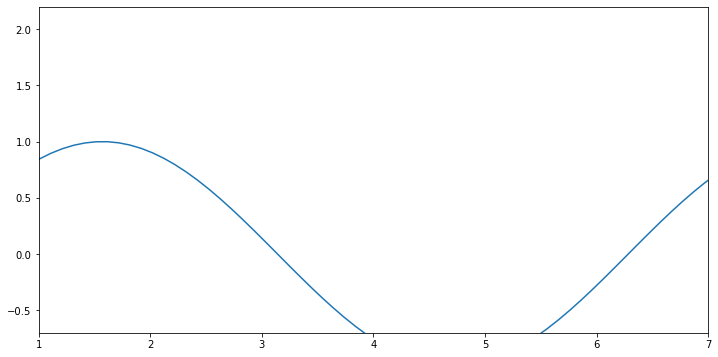

In [10]:
# Setting the x and y limits
fig, ax = create_base_plot()
ax.set_xlim(1,7)
ax.set_ylim(-0.7,2.2)

Text(0, 0.5, 'output')

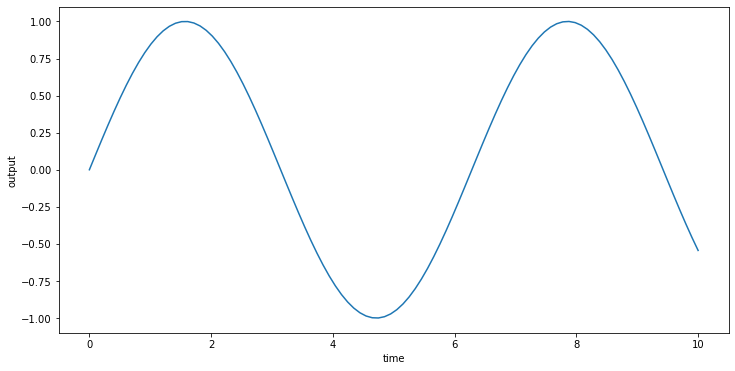

In [11]:
# Setting the x and y labels
fig, ax = create_base_plot()
ax.set_xlabel('time')
ax.set_ylabel('output')

Text(0.5, 1.0, 'This is a blue worm')

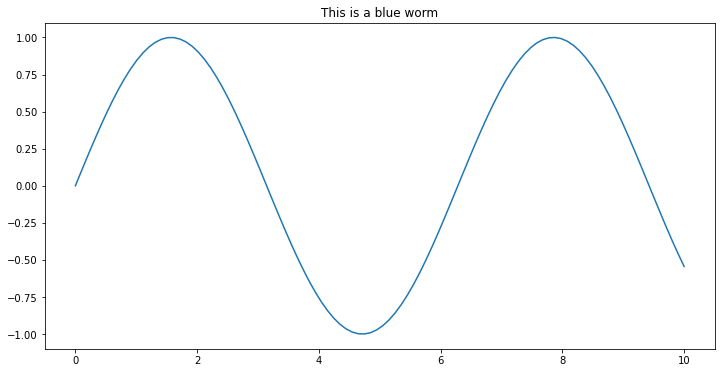

In [12]:
# Setting the title
fig, ax = create_base_plot()
ax.set_title('This is a blue worm')

#### Concept Check 
Plot an exponential curve `y = np.exp(x)` with the following properties:
- 100 x values evenly spaced between 0 and 10
- y axis ranges from -5000 to 25000
- x axis ranges from -1 to 11
- red line
- purple markers (any shape)

In [13]:
# TODO

## Scatter Plots
We could theoretically use the `.plot()` method to make scatter plots `(linestyle='',marker='o')`  
However, the `.scatter(...)` method gives flexibility to control the attributes for each point. 

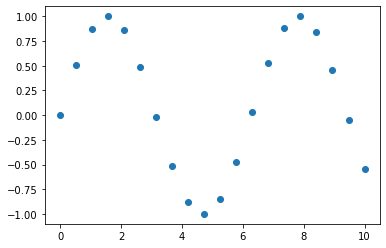

In [14]:
# Using the .plot method to create a scatter plot
x = np.linspace(0,10,20)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), linestyle='', marker='o')

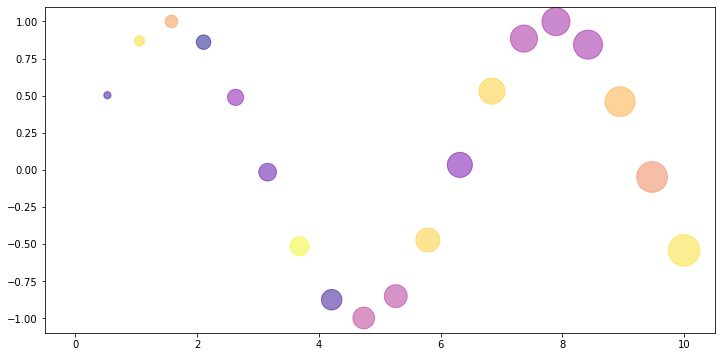

In [15]:
# Using the .scatter method to create a scatter plot
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, np.sin(x), s=x*100, c=np.random.uniform(30,300,20), alpha=0.5, cmap='plasma')

#### Concept Check 
Plot a scatter plot of `y = log(x)` with the following properties:
- x ranges from 0 to 100
- size of the marker is proportional to the y-value
- random colouring for markers (green theme)
- moderate alpha

In [16]:
# TODO

## Histograms and Binning
We can plot histograms by using the `.hist()` method. Some important arguments are:
- `bins`: The number of bins. Can specify an integer denoting the number of bins, or a list specifying the endpoints
- `density`: If this is set to `True`, then the counts in each bin are normalised to form a density estimate

In [17]:
# Let's set up some data
data = np.random.normal(170, 10, 20000) # 20000 samples with mean 170 and std 10

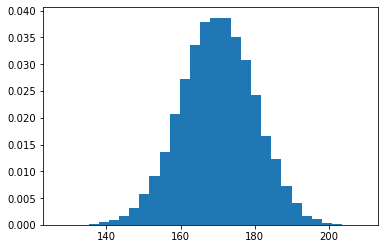

In [18]:
# 1 dimensional histogram
fig, ax = plt.subplots()
result = ax.hist(data, bins=30, density=True)

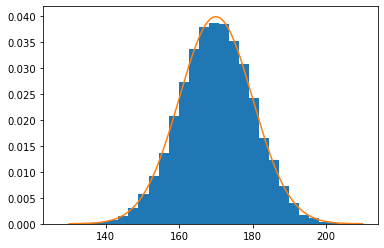

In [19]:
# Overlay the normal distribution curve on top of this histogram
import scipy.stats as ss
x = np.linspace(130,210,1000) # creating 1000 equally spaced points between 130 and 210
y = ss.norm.pdf(x,loc=170,scale=10) # loc <=> mean, scale <=> std

# plotting this data
fig, ax = plt.subplots()
ax.hist(data, density=True, bins=30)
ax.plot(x,y)

### 2-d histogram

In [20]:
mu = [170., 70.]
sigma = [[7.6*7.6, 0.7*7.6*10], 
         [0.7*7.6*10, 10*10]]

data = np.random.multivariate_normal(mu, sigma, 10000)

In [21]:
data.shape

(10000, 2)

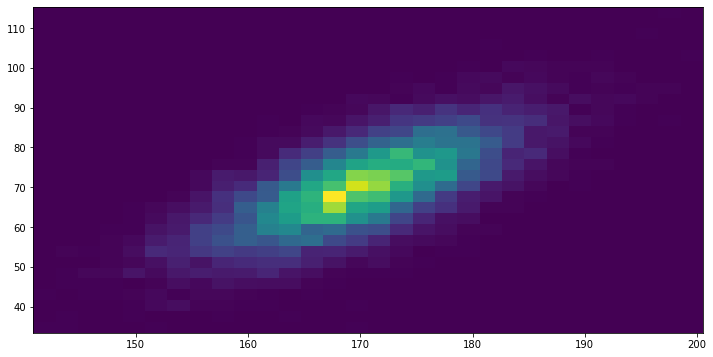

In [22]:
# Plotting the 2-d histogram
x = data[:,0] # first column in data
y = data[:,1] # second column in data

fig, ax = plt.subplots(figsize = (12,6))
hist_data = ax.hist2d(x,y,bins=30)

### Contour plots
Contour plots are used to represent a 3-dimensional surface on a 2-dimensional plot. The values in the third dimension (`z`) are dependent on the values of the two independent variables (`x` and `y`)

In [23]:
# Define a function
def f(x,y):
    z = 2*x**2 + y**2
    return z

In [24]:
# Generate the data
x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

In [25]:
np.shape(Z)

(50, 50)

<a list of 17 text.Text objects>

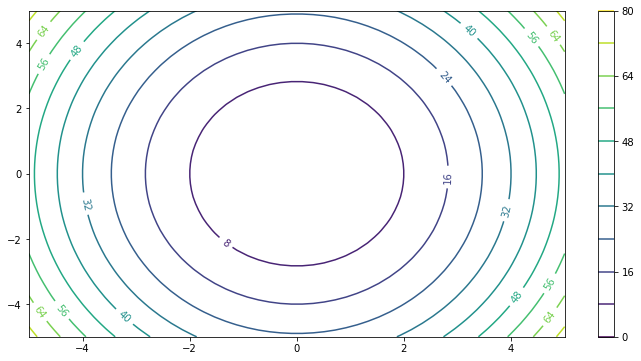

In [26]:
# Draw the contour plot
fig, ax = plt.subplots(figsize = (12,6))
contour_set = ax.contour(X,Y,Z,levels=10)
fig.colorbar(contour_set) # displays the levels in a colorbar
ax.clabel(contour_set) # displays the value of each contour

A filled contour plot can be generated by using `.contourf()` method

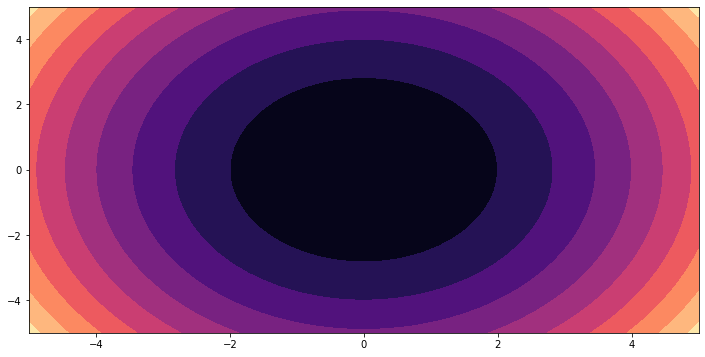

In [27]:
fig, ax = plt.subplots(figsize = (12,6))
contour_set = ax.contourf(X, Y, Z, levels=10, cmap='magma')

You can save Matplotlib figures to your computer by using the `fig.savefig(...)` command

# Plotting with Pandas
Pandas has a plotting module that extends the Matplotlib plotting library to provide additional visualisation options for Pandas series and dataframes. 

### Scatter matrix
A scatter matrix provides a compact representation of the relationships between different columns in a Pandas DataFrame. The main diagonal plots in the scatter matrix correspond to the histogram of the data in the corresponding column

#### Example: Creating a Scatter matrix from the California Housing Dataset

In [28]:
# Pandas imports
import pandas as pd
import numpy as np

In [29]:
# Download the data from scikit-learn datasets
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [30]:
# Inspect the keys in the data dictionary
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [31]:
# Storing the data into a Pandas dataframe
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['price'] = data['target']

In [32]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
df.shape

(20640, 9)

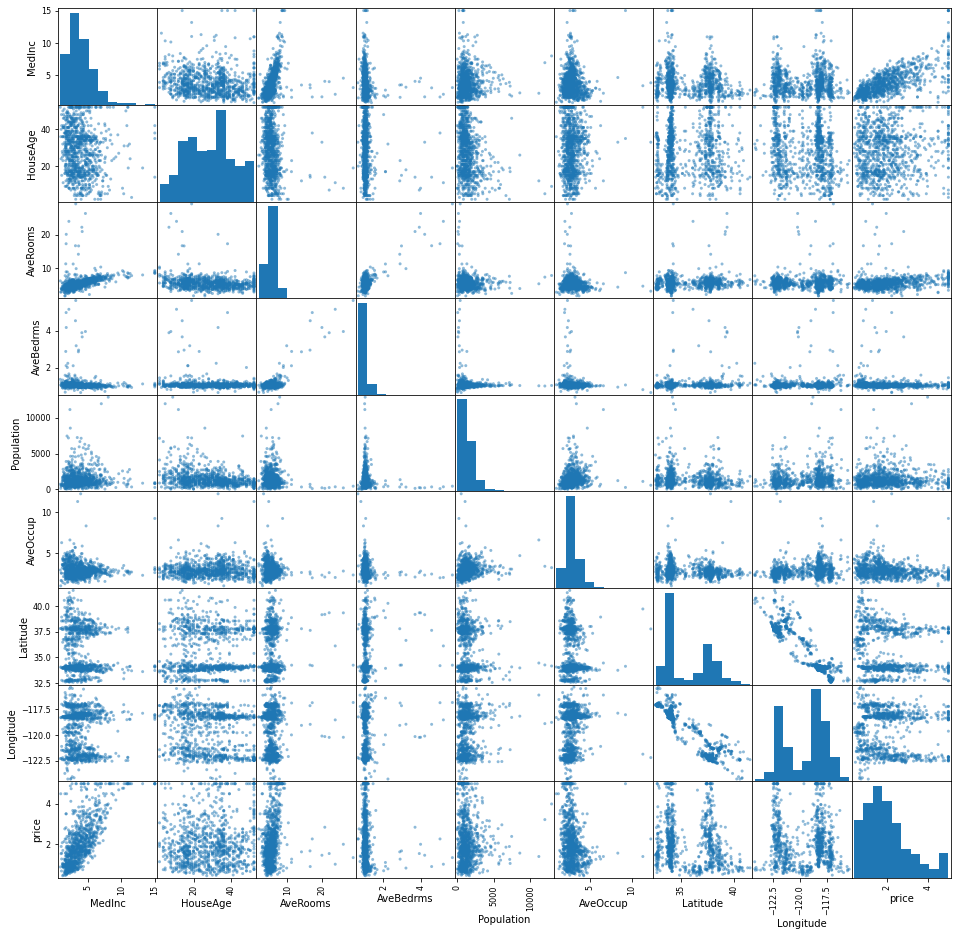

In [34]:
# Plot the scatter matrix
_ = pd.plotting.scatter_matrix(df.sample(n=1000), figsize=(16,16))

#### Concept Check 
Plot the California housing data using a scatterplot. Add the following properties.
- points determined by latitude and longitude
- colour determined by the price
- size determined by population
- alpha should be small
- pick a nice colourmap
- add a colorbar

Hint: You can pass in pandas series object into the ax.scatter method.


In [35]:
# TODO

## Plotting data in DataFrames
Pandas provides the ability to generate different plots from dataframes:
- Line plots
- Bar charts
- Area charts
- Histograms
- Box plots

In [36]:
# Get stock price data
from yahoofinancials import YahooFinancials
companies = ['AAPL', 'MSFT', 'PYPL', 'SBUX'] # Getting the stock prices for Apple, Microsoft, Paypal and Starbucks

yf = YahooFinancials(companies)
stock_prices = yf.get_historical_price_data('2018-01-01', '2021-01-01', 'daily')

ModuleNotFoundError: No module named 'yahoofinancials'

In [ ]:
# Set up our data
dates = [i['formatted_date'] for i in stock_prices['AAPL']['prices']]
data = {c: [i['close'] for i in stock_prices[c]['prices']] for c in companies}

df = pd.DataFrame(data, index = pd.DatetimeIndex(dates))

In [ ]:
# View our data
df.head()

### Line plots
A line plot plots the columns against the index

In [ ]:
df.plot(figsize=(12,6))

### Bar charts
A bar chart plots the values against the index

In [ ]:
df.loc['2019-01-02'] # Get the values for a specific date

In [ ]:
# Plot the bar chart
df.loc['2019-01-02'].plot.bar()

In [ ]:
# Different bar charts on different axes
fig, axarr = plt.subplots(1,2)
df.loc['2020-02-20'].plot.bar(ax = axarr[0])
df.loc['2020-03-20'].plot.bar(ax = axarr[1])
# What's the problem with the above plot? How is the visualisation misleading?
# axarr[0].set_ylim(0,200)
# axarr[1].set_ylim(0,200)

In [ ]:
# Multiple bar chart. Plots multiple bar charts against the index
df.head().plot.bar(figsize=(12,6))

In [ ]:
# Multiple bar chart (stacked)
df.head().plot.bar(stacked=True, figsize=(12,6))

### Area chart
An area chart is an extension of the line plot where the area under the lines are shaded

In [ ]:
df.plot.area(figsize=(12,6)) # Produces a stacked area chart by default

In [ ]:
# Unstacked area chart
df.plot.area(stacked=False, figsize=(12,6))

### Histograms
A histogram provides a representation of the data distribution

In [ ]:
# Generate data for histogram plots
df = pd.DataFrame({'Avg Height of Premier League footballers': 182 + 5*np.random.randn(10000),
                  'Avg Height of NBA Basketball players': 198 + 5*np.random.randn(10000)})

In [ ]:
df.head()

# Plot the histogram
df.plot.hist(bins=30,alpha=0.3,figsize=(10,5))

In [ ]:
# Stacked histogram
# Plot the histogram
df.plot.hist(bins=30,alpha=0.3,figsize=(10,5),stacked=True)

In [ ]:
df.plot.box(rot=10)